<a href="https://colab.research.google.com/github/desriyantidey/SKRIPSI/blob/main/Copy_of_skripsot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/dataset_film.csv')
df.head()

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,The Little Mermaid,tt5971474,I) (2023,"Adventure, Family, Fantasy","Director:, Rob Marshall, | , Stars:, Halle...",A young mermaid makes a deal with a sea witch ...,7.2,135 min,PG,69638,NaN
1,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
2,Dungeons & Dragons: Honor Among Thieves,tt2906216,2023,"Action, Adventure, Comedy","Directors:, John Francis Daley, , Jonathan Gol...",A charming thief and a band of unlikely advent...,7.3,134 min,PG-13,123247,NaN
3,The Super Mario Bros. Movie,tt6718170,2023,"Animation, Adventure, Comedy","Directors:, Aaron Horvath, , Michael Jelenic, ...",A plumber named Mario travels through an under...,7.2,92 min,PG,134835,NaN
4,Spider-Man: Into the Spider-Verse,tt4633694,2018,"Animation, Action, Adventure","Directors:, Bob Persichetti, , Peter Ramsey, ,...",Teen Miles Morales becomes the Spider-Man of h...,8.4,117 min,PG,575321,"190,241,310"


#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            11403 non-null  object 
 1   IMDb ID          11403 non-null  object 
 2   Release Year     11403 non-null  object 
 3   Genre            11403 non-null  object 
 4   Cast             11361 non-null  object 
 5   Synopsis         11403 non-null  object 
 6   Rating           11403 non-null  float64
 7   Runtime          9927 non-null   object 
 8   Certificate      8585 non-null   object 
 9   Number of Votes  11403 non-null  int64  
 10  Gross Revenue    1749 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 980.1+ KB


In [ ]:
df.count()

,0
Title,11403
IMDb ID,11403
Release Year,11403
Genre,11403
Cast,11361
Synopsis,11403
Rating,11403
Runtime,9927
Certificate,8585
Number of Votes,11403


In [ ]:
df.isnull().sum()

,0
Title,0
IMDb ID,0
Release Year,0
Genre,0
Cast,42
Synopsis,0
Rating,0
Runtime,1476
Certificate,2818
Number of Votes,0


In [ ]:
df['Genre'].unique()
df['Genre'].value_counts()

,count
Genre,
"Animation, Action, Adventure",1177
"Action, Adventure, Fantasy",790
"Animation, Adventure, Comedy",651
"Action, Adventure, Comedy",598
"Action, Adventure, Drama",505
...,...
"Mystery, Drama, Fantasy",1
"Fantasy, Sci-Fi, Talk-Show",1
"Fantasy, History, Thriller",1


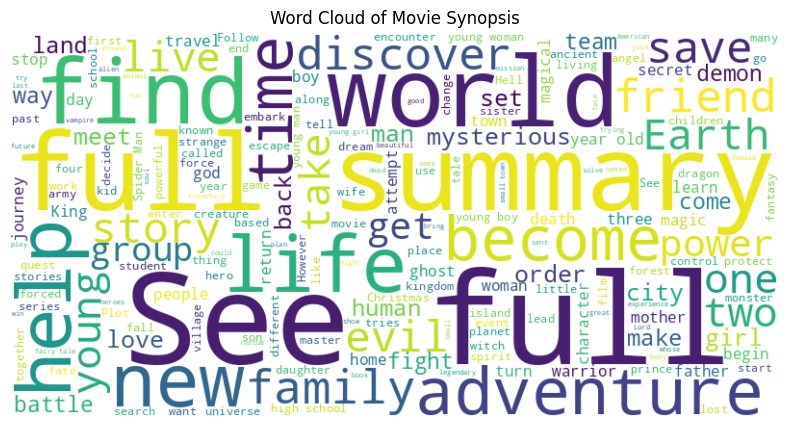

In [ ]:
all_synopsis= " ".join(synopsis for synopsis in df['Synopsis'])
# Membuat WordCloud
wordcloud = WordCloud(stopwords=stopwords.words('english'), width=800, height=400, background_color="white").generate(all_synopsis)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Movie Synopsis')
plt.show()

Distribusi Genre:
Animation    3375
Action       4406
Adventure    5559
Fantasy      6689
Comedy       3844
Drama        3340
Mystery       331
Sci-Fi        238
Talk-Show       2
History        48
Thriller      154
Crime         492
dtype: int64


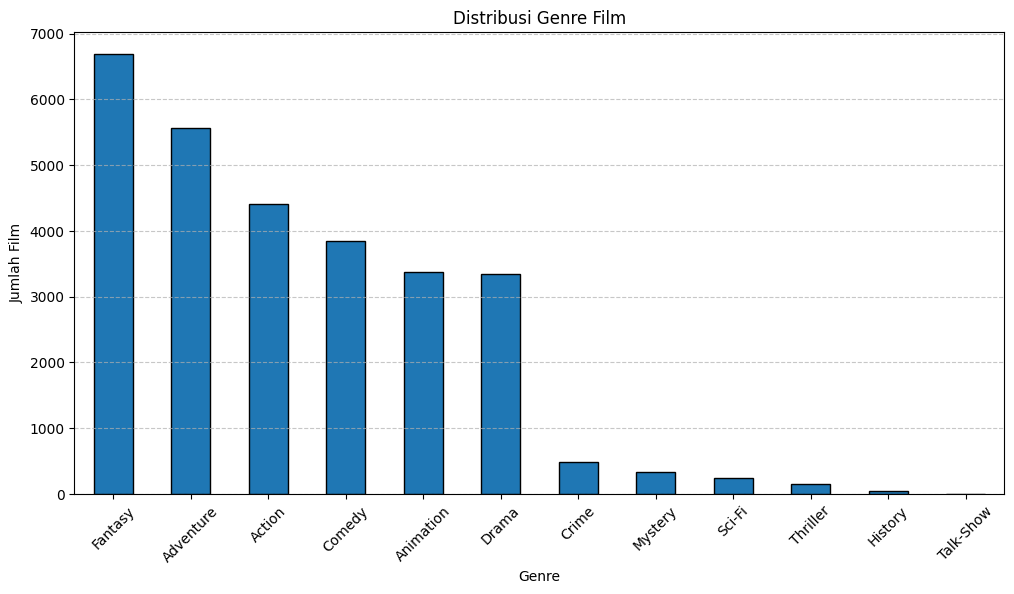

In [ ]:
genres_to_check = ['Animation', 'Action', 'Adventure', 'Fantasy', 'Comedy',
                   'Drama', 'Mystery', 'Sci-Fi', 'Talk-Show', 'History',
                   'Thriller', 'Crime']

# Binarisasi genre
for genre in genres_to_check:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Hitung distribusi setiap genre
genre_distribution = df[genres_to_check].sum()
print("Distribusi Genre:")
print(genre_distribution)

# Visualisasi distribusi genre
plt.figure(figsize=(12, 6))
genre_distribution.sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.title('Distribusi Genre Film')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['Genre'])
genre_counts = genre_matrix.sum(axis=0)

# Frekuensi setiap label
genre_distribution = dict(zip(mlb.classes_, genre_counts))
print(genre_distribution)

{' ': 11223, ',': 11223, '-': 246, 'A': 7327, 'B': 28, 'C': 4164, 'D': 3358, 'F': 7467, 'G': 3, 'H': 1280, 'M': 516, 'N': 1, 'R': 651, 'S': 798, 'T': 159, 'V': 3, 'W': 19, 'a': 10605, 'c': 5422, 'd': 7817, 'e': 8881, 'g': 28, 'h': 733, 'i': 7999, 'k': 2, 'l': 1910, 'm': 9476, 'n': 11296, 'o': 9608, 'p': 34, 'r': 9417, 's': 6694, 't': 11308, 'u': 5761, 'v': 5559, 'w': 5, 'y': 9192}


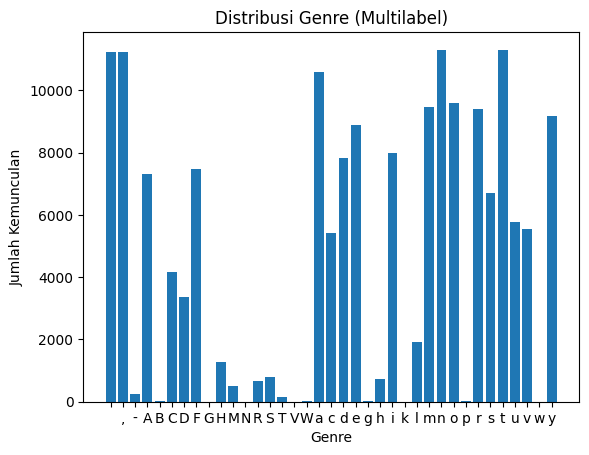

In [ ]:
labels, counts = zip(*genre_distribution.items())

# Bar chart
plt.bar(labels, counts)
plt.title('Distribusi Genre (Multilabel)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Kemunculan')
plt.show()